# Trabajo Práctico 3

Karen Raczkowski

In [18]:
import numpy as np
import scipy.fftpack as fft
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import os
import imutils

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs / images a partir del template Material_TPs / template
1. Obtener una detección del logo en cada imagen sin falsos positivos

In [74]:
# Funcion para cargar las imagenes
def read_img():
    img_dir = './images/'
    ext = ['png', 'jpg']
    files = []
    image_gray = []
    images_canny = []
    imgs_color = []

    for filename in os.listdir(img_dir):
        if filename.lower().endswith(tuple(ext)):
            files.append(os.path.join(img_dir, filename))

    for file in files:
        im = cv.imread(file)
        img_color = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
        image_gray.append(img_gray)
        img_canny = cv.Canny(img_gray, 50, 200)
        images_canny.append(img_canny)
        imgs_color.append(img_color)

    return images_canny, image_gray, imgs_color

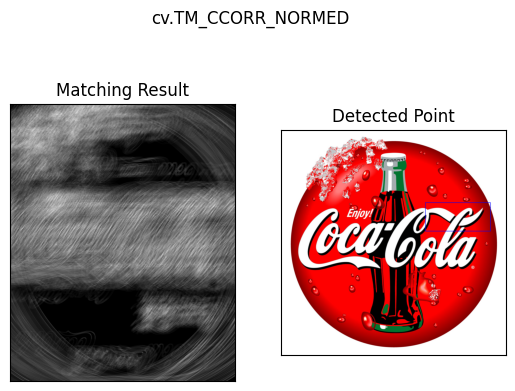

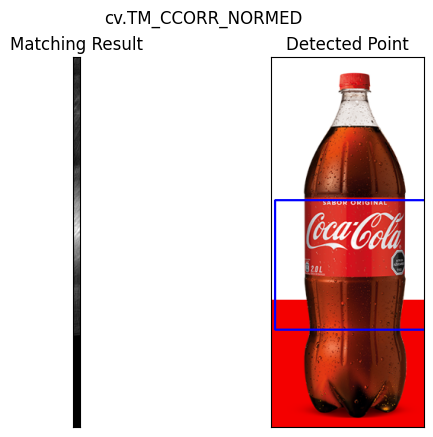

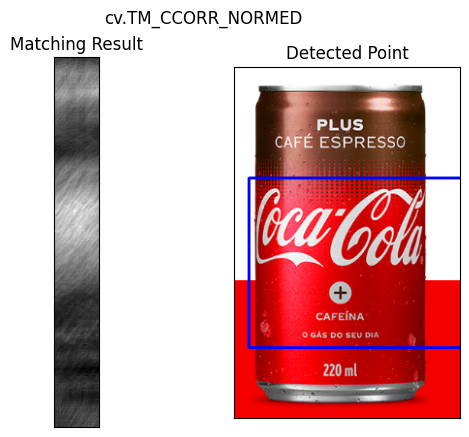

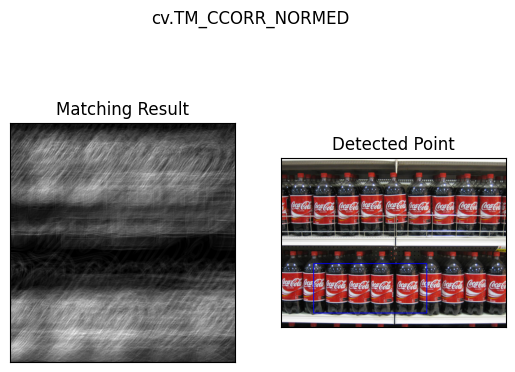

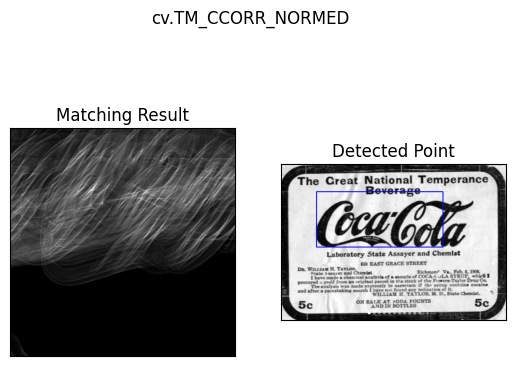

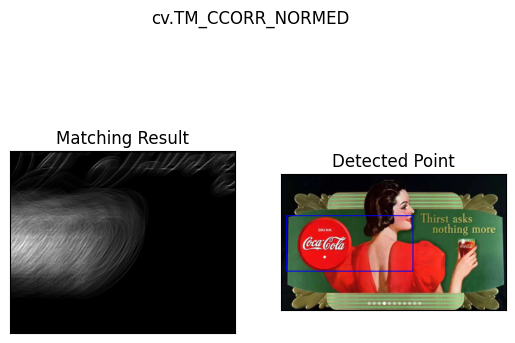

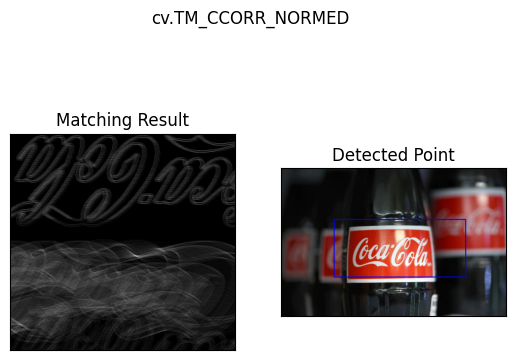

In [195]:
def template_matching():
    # Cargamos la imagen de la plantilla
    pattern = cv.imread('./template/pattern.png', 0)
    pattern = cv.bitwise_not(pattern)

    # Cargamos las imágenes en color y en escala de grises
    imgs, imgs_gray, imgs_rgb = read_img()

    for i, j in zip(range(len(imgs_gray)), range(len(imgs_rgb))):
        w_pattern, h_pattern = pattern.shape[::-1]

        # Si el ancho de la plantilla es mayor que el ancho de la imagen de búsqueda, aplicamos la escala de 0.5
        if w_pattern > imgs_gray[j].shape[1]:
            scale = 0.5
        else:
            scale = 1.0

        # Redimensionamos la plantilla con la escala correspondiente
        template = cv.resize(pattern, (int(pattern.shape[1] * scale), int(pattern.shape[0] * scale)))
        w_pattern, h_pattern = pattern.shape[::-1]
        
        # Aplicamos Canny a la plantilla redimensionada y a la imagen
        image_canny_pattern = cv.Canny(template, threshold1=100, threshold2=200)
        img_canny = cv.Canny(imgs_gray[j], threshold1=500, threshold2=900)

        method = 'cv.TM_CCORR_NORMED'
        img_match = cv.matchTemplate(img_canny, image_canny_pattern, eval(method))
        (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(img_match)

        top_left = max_loc
        bottom_right = (top_left[0] + w_pattern, top_left[1] + h_pattern)
        cv.rectangle(imgs_rgb[j], top_left, bottom_right, (0, 0, 255), 2)

        # Resultados del matching
        plt.subplot(121), plt.imshow(img_match, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

        # Imagen original con el cuadro del bounding box
        plt.subplot(122), plt.imshow(imgs_rgb[j])
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.suptitle(method)
        plt.show()

    return

template_matching()

2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1.

Text(0.5, 1.0, 'Resultado')

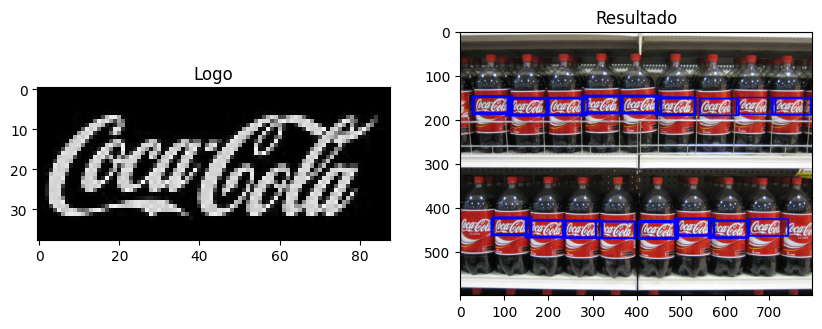

In [179]:
# Cargar y convertir imagenes
img = cv.imread('./images/coca_multi.png')
img_rgb  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
pattern = cv.imread('./template/pattern.png', 0)
# Redimensionar y realizar inversión de colores en la plantilla
scale = 0.222
img_template = cv.bitwise_not(cv.resize(pattern, (int(pattern.shape[1] * scale), int(pattern.shape[0] * scale))))

w, h = img_template.shape[::-1]
# Realizar la coincidencia de plantillas utilizando el método de correlación normalizada
res = cv.matchTemplate(img_gray,img_template,cv.TM_CCORR_NORMED)

# Encontrar las coordenadas donde el valor en el mapa de coincidencia es mayor o igual al umbral
umbral = 0.63
loc = np.where( res >= umbral)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

# Visualización
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_template, cmap='gray')
plt.title('Logo')
plt.subplot(122)
plt.imshow(img_rgb)
plt.title('Resultado')

3. Generalizar el algoritmo del item 2 para todas las imágenes. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [200]:
def detectar_logos(imagen_ruta, plantilla_ruta, umbral, escala):
    # Cargar y convertir la imagen de entrada
    img = cv.imread(imagen_ruta)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    # Cargar y redimensionar la plantilla con inversión de colores
    pattern = cv.imread(plantilla_ruta, 0)
    img_template = cv.bitwise_not(cv.resize(pattern, (int(pattern.shape[1] * escala), int(pattern.shape[0] * escala))))

    w, h = img_template.shape[::-1]

    # Realizar la coincidencia de plantillas utilizando el método de correlación normalizada
    res = cv.matchTemplate(img_gray, img_template, cv.TM_CCORR_NORMED)

    # Encontrar las coordenadas donde el valor en el mapa de coincidencia es mayor o igual al umbral
    loc = np.where(res >= umbral)

    # Dibujar rectángulos alrededor de las ubicaciones encontradas en la imagen de entrada original
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    # Visualización
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(img_template, cmap='gray')
    plt.title('Logo')
    plt.subplot(122)
    plt.imshow(img_rgb)
    plt.title('Resultado')
    plt.show()

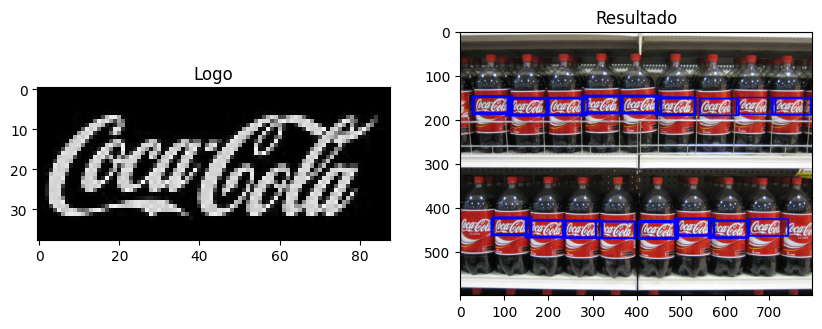

In [201]:
# Uso de la función para detectar logotipos en diferentes imágenes con sus respectivas plantillas
detectar_logos('./images/coca_multi.png', './template/pattern.png', 0.63, 0.222)

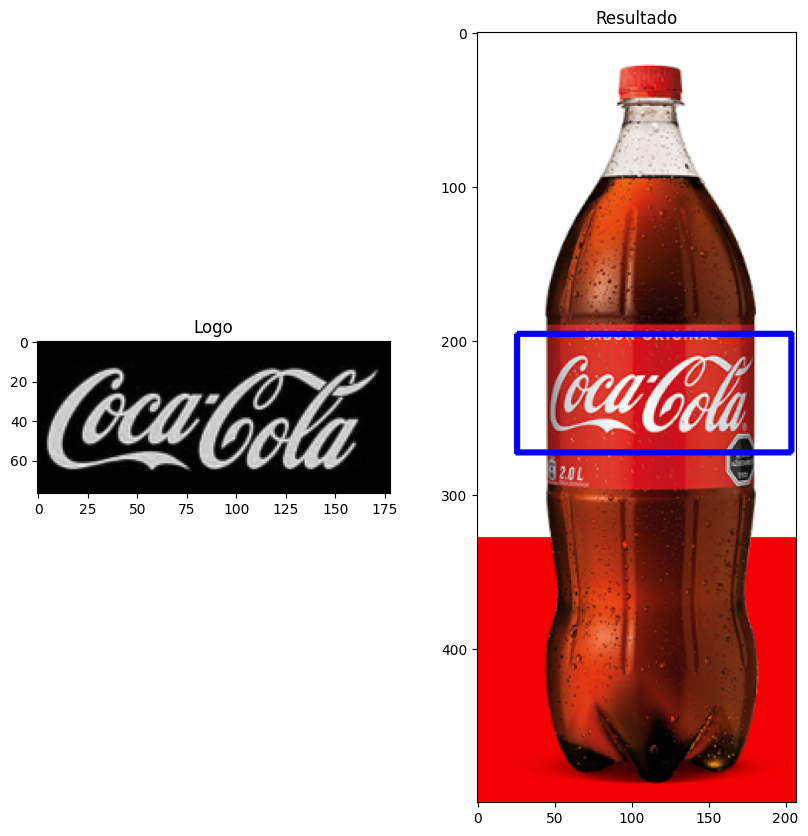

In [237]:
detectar_logos('./images/coca_logo_1.png', './template/pattern.png', 0.547, 0.445)

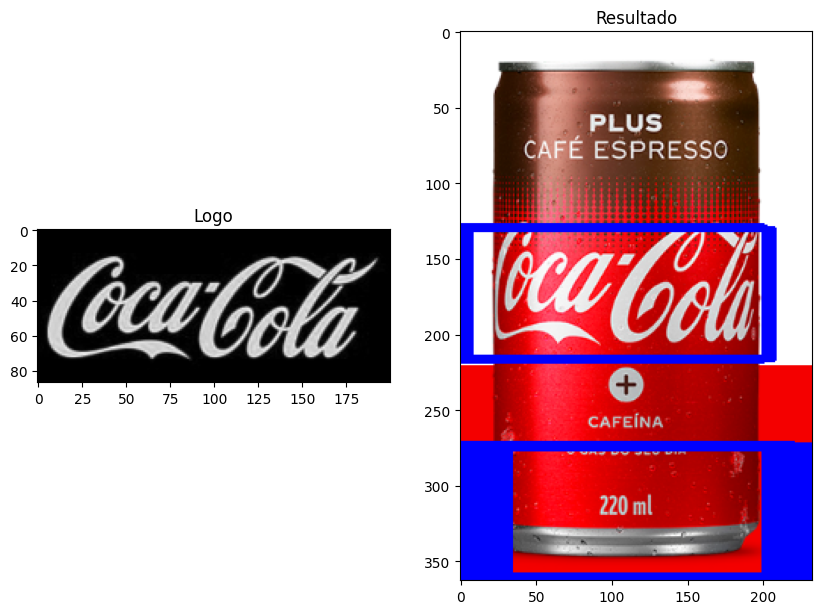

In [396]:
detectar_logos('./images/coca_logo_2.png', './template/pattern.png', 0.47, 0.5)

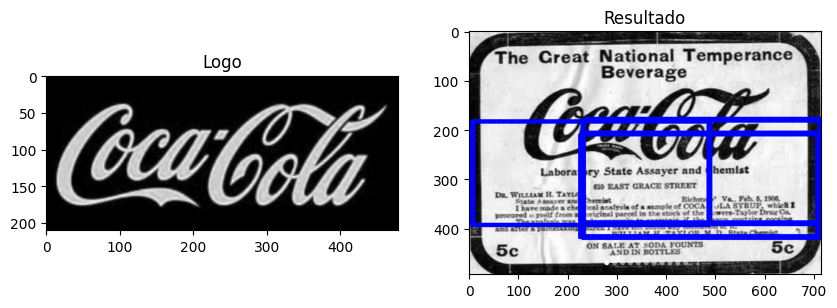

In [386]:
detectar_logos('./images/coca_retro_1.png', './template/pattern.png', 0.54, 1.2)

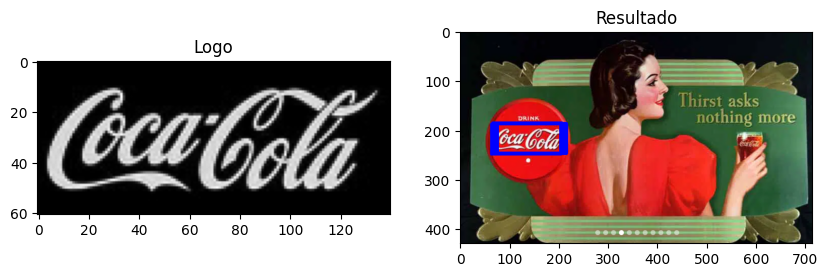

In [348]:
detectar_logos('./images/coca_retro_2.png', './template/pattern.png', 0.615, 0.35)

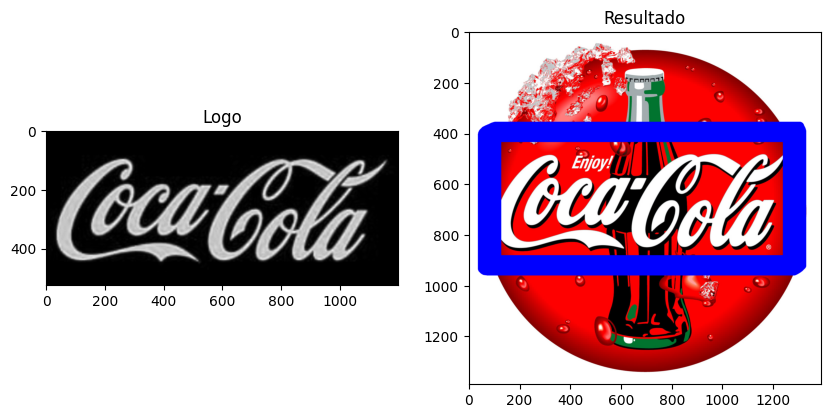

In [357]:
detectar_logos('./images/COCA-COLA-LOGO.jpg', './template/pattern.png', 0.5, 3)

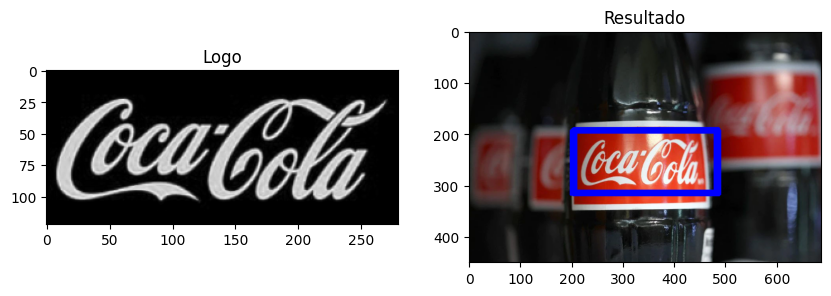

In [372]:
detectar_logos('./images/logo_1.png', './template/pattern.png', 0.6, 0.7)